In [1]:
import json
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# from prior art

human_data = {
    "Hours TV/day": [3.38, 1.63, 2.87],
    "Drinks frat bro consumes/wkend": [11.12, 6.63, 15.64],
    "Sugary drinks/wk": [9.17, 2.41, 5.91],
    "Times honk at drivers/wk": [2.67, 0.72, 2.53],
    "Hours Exercise/wk": [4.00, 5.58, 6.33],
    "Mins on social media/day": [60.57, 35.40, 59.10],
    "Cals consumed/day": [2225.91, 1900.00, 1859.24],
    "Times parent punishes child/month": [6.58, 2.28, 3.25],
    "Servings fruits & veggies/month": [40.00, 94.96, 39.16],
    "Miles walked/wk": [9.79, 12.96, 9.96],
    "Lies told/wk": [9.57, 1.17, 8.44],
    "% people drive drunk": [11.30, 1.23, 9.45],
    "Mins late for appointment": [14.22, 3.04, 13.60],
    "Times cheat on partner in life": [1.52, 0.00, 1.73],
    "Books read/yr": [7.22, 17.40, 8.45],
    "Times snooze alarm/day": [2.13, 0.76, 1.98],
    "Romantic partners in life": [6.09, 5.77, 8.06],
    "Parking tickets/yr": [1.67, 0.04, 1.37],
    "Country’s international conflicts/decade": [11.67, 1.36, 4.15],
    "Times car wash/yr": [10.77, 12.85, 11.31],
    "$ cheated on taxes": [437.45, 82.00, 350.32],
    "Cups coffee/day": [2.21, 1.84, 2.72],
    "% students cheat on HS exam": [33.00, 2.17, 19.50],
    "Desserts/wk": [3.85, 2.92, 4.04],
    "Times checking phone/day": [28.57, 7.68, 16.57],
    "Loads of laundry/wk": [3.42, 2.70, 3.75],
    "Mins waiting on phone for customer service": [20.21, 3.88, 13.29],
    "% smokers": [22.81, 6.16, 20.79],
    "Times called parents/month": [5.00, 5.50, 7.04],
    "% HS students underage drink": [35.81, 13.71, 32.96],
    "Times clean home/month": [5.78, 4.35, 6.24],
    "% lie on dating website": [50.56, 13.40, 47.20],
    "Times computer crash/wk": [3.07, 0.12, 1.14],
    "Servings carbs/day": [62.43, 16.13, 33.23],
    "% HS dropouts": [10.67, 1.29, 11.49],
    "Txt msgs sent/day": [27.18, 12.88, 18.10],
    "% middle schoolers bullied": [17.59, 0.81, 19.46],
    "Times lose temper/wk": [2.60, 0.56, 2.20],
    "Hrs slept/night": [6.69, 7.84, 7.32],
    "Times swearing/day": [8.69, 5.88, 11.26]
}


In [3]:
human_LLM_data = {"Hours TV/day": 'NUMBER OF HOURS OF TV FOR A PERSON TO WATCH IN A DAY',
    "Drinks frat bro consumes/wkend": 'NUMBER OF DRINKS FOR A FRAT BROTHER TO CONSUME IN A WEEKEND',
    "Sugary drinks/wk": 'NUMBER OF SUGARY DRINKS FOR A PERSON TO CONSUME IN A WEEK',
    "Times honk at drivers/wk": 'NUMBER OF TIMES FOR A PERSON TO HONK AT OTHER DRIVERS IN A WEEK',
    "Hours Exercise/wk": 'NUMBER OF HOURS FOR A PERSON TO SPEND EXERCISING IN A WEEK',
    "Mins on social media/day": 'NUMBER OF MINUTES FOR A PERSON TO SPEND ON SOCIAL MEDIA IN A DAY',
    "Cals consumed/day": 'NUMBER OF CALORIES FOR A PERSON TO CONSUME IN A DAY',
    "Times parent punishes child/month": 'NUMBER OF TIMES FOR A PARENT TO PUNISH HIS/HER CHILD IN A MONTH',
    "Servings fruits & veggies/month": 'NUMBER OF SERVINGS OF FRUITS AND VEGETABLES FOR A PERSON TO CONSUME IN A MONTH',
    "Miles walked/wk": 'NUMBER OF MILES FOR A PERSON TO WALK IN A WEEK',
    "Lies told/wk": 'NUMBER OF LIES FOR A PERSON TO TELL IN A WEEK',
    "% people drive drunk": 'PERCENTAGE OF PEOPLE IN ANY GIVEN CITY TO DRIVE DRUNK',
    "Mins late for appointment":'NUMBER OF MINUTES FOR A DOCTOR TO BE LATE FOR AN APPOINTMENT',
    "Times cheat on partner in life": 'NUMBER OF TIMES FOR A PERSON TO CHEAT ON A SIGNIFICANT OTHER IN A LIFETIME',
    "Books read/yr": 'NUMBER OF BOOKS FOR A PERSON TO READ IN AN YEAR',
    "Times snooze alarm/day": 'NUMBER OF TIMES FOR A PERSON TO HIT SNOOZE ON AN ALARM CLOCK IN A DAY',
    "Romantic partners in life": 'NUMBER OF ROMANTIC PARTNERS FOR A PERSON TO HAVE IN A LIFETIME',
    "Parking tickets/yr": 'NUMBER OF PARKING TICKETS FOR A PERSON TO RECEIVE IN A YEAR',
    "Country’s international conflicts/decade": 'NUMBER OF INTERNATIONAL CONFLICTS FOR A COUNTRY TO HAVE IN A DECADE',
    "Times car wash/yr": 'NUMBER OF TIMES FOR A PERSON TO GET HIS/HER CAR WASHED IN A YEAR',
    "$ cheated on taxes": 'NUMBER OF DOLLARS FOR A PERSON TO CHEAT ON HIS/HER TAXES',
    "Cups coffee/day": 'NUMBER OF CUPS OF COFFEE FOR A PERSON TO DRINK IN A DAY',
    "% students cheat on HS exam": 'PERCENTAGE OF STUDENTS IN A HIGH SCHOOL TO CHEAT ON AN EXAM',
    "Desserts/wk": 'NUMBER OF DESSERTS FOR A PERSON TO CONSUME IN A WEEK',
    "Times checking phone/day": 'NUMBER OF TIMES FOR A PERSON TO CHECK HIS/HER PHONE IN A DAY',
    "Loads of laundry/wk":'NUMBER OF LOADS OF LAUNDRY FOR A PERSON TO DO IN A WEEK',
    "Mins waiting on phone for customer service": 'NUMBER OF MINUTES FOR A PERSON TO SPEND WAITING ON THE PHONE FOR CUSTOMER SERVICE',
    "% smokers": 'PERCENTAGE OF ADULTS IN ANY GIVEN CITY TO SMOKE',
    "Times called parents/month": 'NUMBER OF TIMES FOR A PERSON TO CALL HIS/HER PARENTS IN A MONTH',
    "% HS students underage drink": 'PERCENTAGE OF STUDENTS IN A HIGH SCHOOL TO DRINK UNDERAGE',
    "Times clean home/month": 'NUMBER OF TIMES FOR A PERSON TO CLEAN HIS/HER HOME IN A MONTH',
    "% lie on dating website": 'PERCENTAGE OF PEOPLE TO LIE ON A DATING WEBSITE',
    "Times computer crash/wk": 'NUMBER OF TIMES FOR A COMPUTER TO CRASH IN A WEEK',
    "Servings carbs/day": 'NUMBER OF SERVINGS OF CARBOHYDRATES FOR A PERSON TO CONSUME IN A DAY',
    "% HS dropouts": 'PERCENTAGE OF STUDENTS IN A HIGH SCHOOL TO DROPOUT',
    "Txt msgs sent/day":'NUMBER OF TEXT MESSAGES FOR A PERSON TO SEND IN A DAY',
    "% middle schoolers bullied": 'PERCENTAGE OF STUDENTS IN A MIDDLE SCHOOL TO BE BULLIED',
    "Times lose temper/wk": 'NUMBER OF TIMES FOR A PERSON TO LOSE HIS/HER TEMPER IN A WEEK',
    "Hrs slept/night": 'NUMBER OF HOURS FOR A PERSON TO SLEEP IN A NIGHT',
    "Times swearing/day": 'NUMBER OF TIMES FOR A PERSON TO SWEAR IN A DAY'}


In [4]:
loaded_data = np.load('./temp_default.npz')
Out = {key: loaded_data[key] for key in loaded_data.files}

In [7]:
Alpha = {}
for human in human_LLM_data.keys():
    llm = human_LLM_data[human]
    if llm in Out.keys():
        val_llm = np.mean(Out[llm],axis=0)
        val_human = human_data[human]
        if not ((val_llm[0] == val_llm[1]) or (val_human[0] == val_llm[1])):
            alpha_llm = (val_llm[2] - val_llm[0]) / (val_llm[1]  - val_llm[0])
            alpha_human = (val_human[2] - val_human[0])/ (val_human[1] - val_human[0]) 
            Alpha[llm] =  [alpha_human,alpha_llm]

In [8]:
Alpha_plot = []
for key in Alpha:
    Alpha_plot.append(Alpha[key])
Alpha_plot = np.array(Alpha_plot)

In [9]:
alphas_human , alphas_llm = Alpha_plot[:,0], Alpha_plot[:,1]

In [10]:
Alpha_human = []
Alpha_llm = []
for i in range(len(alphas_human)):
        Alpha_human.append(alphas_human[i])
        Alpha_llm.append(alphas_llm[i])        

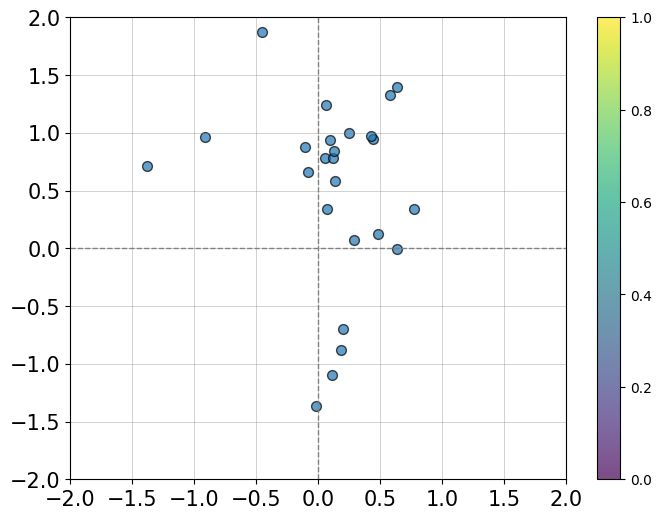

In [11]:
plt.figure(figsize=(8, 6))

scatter = plt.scatter(Alpha_human, Alpha_llm, alpha=0.7 ,  edgecolors='k', s=50)

plt.axhline(y=0, color='#808080', linestyle='--', linewidth=1)
plt.axvline(x=0, color='#808080', linestyle='--', linewidth=1)
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

plt.ylim(-2, 2)
plt.xlim(-2, 2)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

cbar = plt.colorbar(scatter)
plt.show()